## 1.	Create two histograms in a subplot (vertical or horizontal is fine) that show the distribution of reviews_per_month and number_of_reviews in Belize Airbnb data 
### a.	How do you choose your bin size?
#### according to a google search the number of bins should be the number of data points square rooted and rounded up. There were 2796 rows so bins should be 53. This doesn't seem right, seems like too many


In [100]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import math 
import statistics
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

file_to_load = "belize_airbnb_listings.csv"

belize_df = pd.read_csv(file_to_load)
belize_df.head()
belize_df


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,36666,Mo's Cozy Casa w/ veranda & access to dock,157752,Monique,Belize,Belize Islands,17.747860,-88.023980,Entire home/apt,141,3,250,2/23/2021,2.00,5,225
1,36690,Mo's Cozy Cabana w/ comfy veranda & access to ...,157752,Monique,Belize,Belize Islands,17.748320,-88.024740,Entire home/apt,71,3,316,2/19/2021,2.46,5,164
2,108932,Purple House eco solar w/ ocean & wildlife views,563377,Michael,Belize,Belize Islands,17.732210,-88.038240,Entire home/apt,191,2,30,3/14/2020,0.78,1,364
3,110483,Michelo's fuchsia suite,567809,Michel,Stann Creek,Stann Creek Mainland,16.521140,-88.369260,Hotel room,121,1,27,2/24/2020,0.29,3,331
4,120115,Seaside Villas Second Floor Unit #4,604999,Bobbi,Belize,Belize Islands,17.741660,-88.023950,Entire home/apt,343,1,30,3/18/2020,0.64,22,203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2791,48283996,Magical Island,17994012,Ronald,Belize,Belize Islands,17.945690,-87.944620,Entire home/apt,1054,3,0,NaN,NaN,2,347
2792,48287613,"The Luxury Suite - Corozal, Bz- 3Bdr/2bthr CASA1",375769845,Michael,Corozal,Corozal,18.374630,-88.400190,Entire home/apt,401,3,0,NaN,NaN,2,302
2793,48296096,Lagoon front apartment w/shared pool - two mi...,76414486,Vacasa Belize,Belize,Belize Islands,17.934580,-87.955220,Entire home/apt,252,1,0,NaN,NaN,204,364
2794,48296978,Beachfront Poolside Condo,15308338,Alexandra,Belize,Belize Islands,17.930010,-87.957120,Entire home/apt,242,3,0,NaN,NaN,4,364


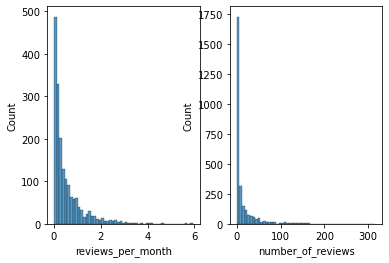

In [174]:
## according to a google search the number of bins should be the number of data points square rooted and rounded up. 
## There were 2796 rows so bins should be 53. This doesn't seem right.


fig, axes = plt.subplots(1, 2)

sns.histplot(ax=axes[0], x='reviews_per_month', data=belize_df, bins=53)
sns.histplot(ax=axes[1], x='number_of_reviews', data=belize_df, bins=53)
plt.show()

## 2.	Create a box and whisker plot for availability_365. What does this show you?


#### What it shows is the minimum value, the 25th percentile, median, 75th percentile, max value, and potential outliers. 
#### Within the box we have the IQR - 25th percentile to 75th percentile. 
#### It also has lopsided whiskers with the difference between the 75th percentile and max value almost nonexistent. I guess that does make sense if there are a limited number of days available. There aren't going to be any that go past that amount of days. 

#### The data is skewed high with 50% of them being available 349 days or more. 75% are available 221 days or more. 


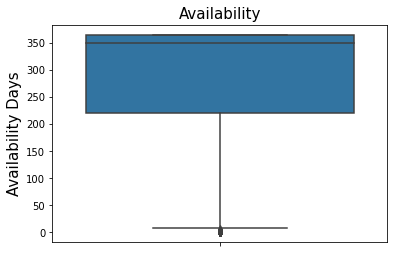

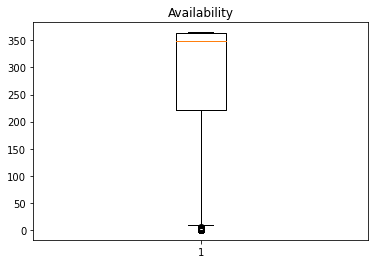

count    2796.000000
mean      280.315451
std       120.617632
min         0.000000
25%       221.000000
50%       349.000000
75%       364.000000
max       365.000000
Name: availability_365, dtype: float64
349.0


In [160]:

sns.boxplot(y="availability_365", 
            data=belize_df)
plt.ylabel("Availability Days", size = 15)
plt.title('Availability', size=15)

plt.show()

fig1, ax1 = plt.subplots()
ax1.set_title('Availability')
ax1.boxplot(belize_df['availability_365'])
plt.show()

print(belize_df['availability_365'].describe())
print(belize_df['availability_365'].median())

## 3. What is the probability that the price for an Airbnb is under 50 dollars
#### There are 2796 possibilities to choose from. 70 of them are less than or equal to 50. That makes the probibility of the price under $50 of 1.75%
### a.	What do you notice about these records? Hint: look at the other columns.
#### They're almost all private or shared rooms
### b.	What distribution does this data most closely fit?
#### It is right skewed


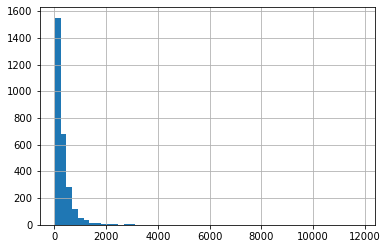

1.7525035765379111


In [210]:
belize_df['price'].hist(bins = 53)
plt.show()



prob = len(belize_df[belize_df['price'] < 50])/len(belize_df) * 100
print(prob)


In [163]:
new_df = belize_df.sort_values('price', ascending=True)
new_df.head(49)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
172,4936432,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51426,-88.22121,Shared room,20,1,16,2/4/2020,0.24,10,365
134,4005831,"Home away from home, Shared dormitory, NO AC",9315171,Julia,Belize,Belize Mainland,17.51482,-88.22233,Private room,20,1,2,3/1/2020,0.03,10,365
315,10004488,Long Term Stay in the country,48785884,Barbara And Bart,Orange Walk,Orange Walk,18.08422,-88.54060,Entire home/apt,22,28,0,NaN,NaN,2,115
2480,43565943,Mama Tina's Medicinal RVs Campsite &Farm,211487445,Moncho,Cayo,Cayo,17.07565,-89.13084,Entire home/apt,24,1,0,NaN,NaN,2,364
912,21693610,Dorm Bed in San Ignacio,145194031,Francisco & Nelli,Cayo,Cayo,17.16216,-89.06854,Shared room,24,2,36,3/5/2020,0.93,5,52
2782,48216307,Almond Hill home with a view,389033375,Melanie,Belize,Belize Mainland,17.41699,-88.31700,Private room,24,1,0,NaN,NaN,1,89
189,5509363,"Yaxche Jungle Camp, Dormitory",6960726,Yaxche Jungle Camp,Cayo,Cayo,17.15125,-88.66244,Shared room,24,1,30,2/25/2020,0.42,2,365
1109,23767825,HOTEL EL VIAJERO,178284067,Cess,Cayo,Cayo,17.06131,-89.15068,Private room,26,1,5,3/16/2019,0.15,1,365
1570,31365497,Belize City Home nice neighborhood,234893400,Peter,Belize,Belize Mainland,17.49769,-88.19049,Shared room,26,1,12,12/20/2019,0.47,1,179
344,11015225,Fern Cabin,52665457,Vanessa,Stann Creek,Stann Creek Mainland,17.03380,-88.51922,Private room,28,7,7,2/15/2020,0.19,9,218


## 4.	Calculate the sample variance and standard deviation for all the numerical columns in the same output. 
### a.	Why sample variance and not population variance? 
#### Because it is not the entire population

### b.	What is your takeaway for each metric?

#### Host id - means nothing, it is just a random number
#### id - same as host id, random number

#### latitude and longitude - it is a small area so the variance and standard deviation are going to be small

#### price - huge standard deviation in price which makes sense. The prices are all over the place. 
#### min nights - fairly low standard deviation considering the max number of minimum nights is 180. 
#### number of reviews - standard deviation is moderate considering the min is 0 and the max is 316
#### reviews per month - low variance and standard deviation
#### calculated host listings - high variance and standard deviation
#### availability 365 - large variance and standard deviataion



### c.	What are the scales of measurement for each of these values?  
#### Ratio -  price, minimum nights, number of reviews,  reviews per month, calculated host listings, availability,
#### Interval - lat and longitude
#### ordinal - host id, id. I was back and forth on this but I'm going to assume that the ids are issued in chronological order so there is at least some order to them and they aren't meaningless making them nominal. 


In [184]:
belize_df['availability_365'].min()

0

In [156]:
#belize_df.agg([statistics.variance, statistics.stdev])
belize_df.agg(['var' , 'std'])



,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
var,1.661428e+14,1.036327e+16,0.288841,0.147361,317109.568066,32.147122,919.773508,0.438448,2674.046405,14548.613157
std,1.288964e+07,1.018001e+08,0.537440,0.383876,563.124825,5.669843,30.327768,0.662154,51.711183,120.617632


## 5.	What percent of Airbnb listings in Belize are available 360 days a year or more?
#### 39.52%
### a.	360 days or less?
#### 61.55%
### b.	What distribution does this data most closely fit?
#### left skewed

360 or more is 39.52074391988555
360 or less is 61.55221745350501


<AxesSubplot:>

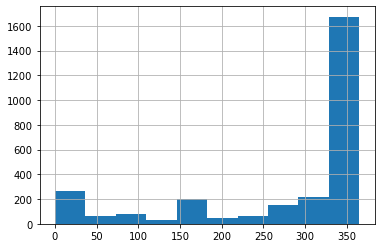

In [214]:


over_prob = len(belize_df[belize_df['availability_365'] >= 360])/len(belize_df) *100
print ('360 or more is ' + str(over_prob))

under_prob = len(belize_df[belize_df['availability_365'] <= 360])/len(belize_df) *100
print ('360 or less is ' + str(under_prob))

        
belize_df['availability_365'].hist()





## 6.	What minimum night count are 75% of Airnbnb listing in Belize greater than?
#### 1

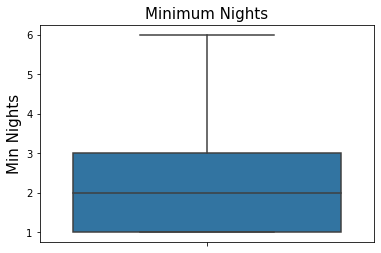

count    2796.000000
mean        2.263948
std         5.669843
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max       180.000000
Name: minimum_nights, dtype: float64

In [206]:

sns.boxplot(y="minimum_nights", 
            data=belize_df, showfliers=False)
plt.ylabel("Min Nights", size = 15)
plt.title('Minimum Nights', size=15)

plt.show()

belize_df['minimum_nights'].describe()